# Trading Strategies

To demonstrate an application of a few of the techniques covered in the prior segment this section will explore trading strategies by attempting to replicate a portion of the findings in ["Quantifying Trading Behavior in Financial Markets Using Google Trends."](https://www.nature.com/articles/srep01684)

The paper intended to determine how the frequency of certain searched terms in the Google search engine relate to market movements. More specifically the authors utilize Google Trends query data to see if the information found there is relevant to the trading decisions being made from January first 2004 to February the twenty-eighth 2011. Stock market data from the same time period is obtained from the Dow Jones Industrial Average, and the terms used are finance centric which are then expanded upon by incorporating suggested terms from Google Sets. A correlation is eventually determined between the volume of searches and the movements of the Dow Jones. In the proposed trading strategy, a trader should take a long position if there was an increase in the average number of searches in a three-week period, and conversely they should short if the search frequency has decreased in that three-week period from the previous average period. Compared to a random selection strategy this approach was concluded to provide a noticeable improvement in results. 

In [194]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader import data as web

pd.set_option('precision', 5)
pd.set_option('display.max_rows', 15)

%matplotlib inline

## Gathering and Formatting Data

**More Information: https://trends.google.com/trends/**

In [195]:
# Import the data used in the paper.
data_from_publication = pd.read_csv('data_from_publication.dat', delimiter = ' ', parse_dates=[0, 1, 100, 101])
data_from_publication

,Google Start Date,Google End Date,arts,banking,bonds,bubble,buy,cancer,car,cash,...,trader,train,transaction,travel,unemployment,war,water,world,DJIA Date,DJIA Closing Price
0,2004-01-04,2004-01-10,0.95667,0.19333,0.20333,0.18333,2.41667,0.91333,4.19333,0.32667,...,0.34667,0.70667,0.05000,2.06000,0.33667,2.02000,1.91333,4.83333,2004-01-12,10485.18
1,2004-01-11,2004-01-17,0.97000,0.20333,0.18667,0.19000,2.31667,0.94000,4.22000,0.32000,...,0.34667,0.67667,0.05000,2.05333,0.29667,2.09333,1.93333,4.76667,2004-01-20,10528.66
2,2004-01-18,2004-01-24,0.92667,0.19667,0.19000,0.17333,2.35000,0.90667,4.10667,0.32000,...,0.35667,0.71333,0.05667,2.01333,0.31000,1.97333,1.89333,4.60000,2004-01-26,10702.51
3,2004-01-25,2004-01-31,0.95000,0.19667,0.18000,0.19667,2.26667,0.90667,3.99333,0.33000,...,0.33667,0.71000,0.06000,1.91333,0.29667,1.90667,1.92000,4.53333,2004-02-02,10499.18
4,2004-02-01,2004-02-07,0.89333,0.20333,0.18333,0.17333,2.08333,0.91333,3.84000,0.30333,...,0.32667,0.63000,0.05000,1.76667,0.29000,2.08667,1.88667,4.53333,2004-02-09,10579.03
5,2004-02-08,2004-02-14,0.94333,0.20000,0.19000,0.18000,2.21667,0.91333,4.00667,0.32667,...,0.35333,0.67000,0.05667,1.92667,0.28333,2.23333,1.98667,4.73333,2004-02-17,10714.88
6,2004-02-15,2004-02-21,0.91333,0.20000,0.18000,0.18000,2.20000,0.94333,4.04667,0.33667,...,0.36000,0.70000,0.05333,1.88667,0.27000,2.06667,1.98667,4.60000,2004-02-23,10609.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,2011-01-09,2011-01-15,0.50000,0.56000,0.13000,0.27333,2.85000,0.88000,3.04667,0.40333,...,0.28667,0.77333,0.04000,0.92667,0.65333,1.20667,1.90000,3.63333,2011-01-18,11837.93
367,2011-01-16,2011-01-22,0.50000,0.54333,0.13000,0.31333,2.88333,0.83333,3.06000,0.39333,...,0.30333,0.75333,0.04000,0.90667,0.67333,1.10000,1.95333,3.53333,2011-01-24,11980.52


In [196]:
# Create new subset DataFrame that extracts only the DJIA closing prices
# along with the normalized 'debt' term search volume column and the Google Trends week end date.
# The debt term produced the best results in the paper so that is what will be used for a simple reproduction.
subset_data_from_publication = pd.DataFrame({'Debt Term Search Volume': data_from_paper['debt'].astype(np.float64),
                                             'Google Trends Week End': data_from_paper['Google End Date'], 
                                             'DJIA Closing Price': data_from_paper['DJIA Closing Price'].astype(np.float64)})
subset_data_from_publication

,DJIA Closing Price,Debt Term Search Volume,Google Trends Week End
0,10485.18,0.21000,2004-01-10
1,10528.66,0.21000,2004-01-17
2,10702.51,0.21000,2004-01-24
3,10499.18,0.21333,2004-01-31
4,10579.03,0.20000,2004-02-07
5,10714.88,0.20333,2004-02-14
6,10609.62,0.20000,2004-02-21
...,...,...,...
366,11837.93,0.17000,2011-01-15
367,11980.52,0.18000,2011-01-22


## Implementing the trading strategy

In [197]:
# Move Google Trends Week End into the index position.
dataset = subset_data_from_paper.reset_index().set_index('Google Trends Week End')
dataset.drop(['index'], inplace=True, axis=1)

# Calculate the moving average for various three-week periods that occur before every applicable week.
dataset['Debt Search Volume Moving Average'] = dataset['Debt Term Search Volume'].shift(1).rolling(window=3).mean()
dataset

,DJIA Closing Price,Debt Term Search Volume,Debt Search Volume Moving Average
Google Trends Week End,,,
2004-01-10,10485.18,0.21000,NaN
2004-01-17,10528.66,0.21000,NaN
2004-01-24,10702.51,0.21000,NaN
2004-01-31,10499.18,0.21333,0.21000
2004-02-07,10579.03,0.20000,0.21111
2004-02-14,10714.88,0.20333,0.20778
2004-02-21,10609.62,0.20000,0.20556
...,...,...,...
2011-01-15,11837.93,0.17000,0.14556


**More Information: https://www.investopedia.com/terms/s/sma.asp**

**Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html**

In [198]:
# In the case of a decrease in Moving Average a 1 is inputed while a -1 is assigned if there is an increase.
# 1 signifies a long position
# -1 signifies a short position
dataset['DSV Execution'] = 0 

dataset.loc[dataset['Debt Term Search Volume'] > dataset['Debt Search Volume Moving Average'], 'DSV Execution'] = -1
dataset.loc[dataset['Debt Term Search Volume'] < dataset['Debt Search Volume Moving Average'], 'DSV Execution'] = 1

# Show just a subset of the DataFrame.
dataset[['Debt Term Search Volume', 'Debt Search Volume Moving Average', 'DSV Execution']]

,Debt Term Search Volume,Debt Search Volume Moving Average,DSV Execution
Google Trends Week End,,,
2004-01-10,0.21000,NaN,0
2004-01-17,0.21000,NaN,0
2004-01-24,0.21000,NaN,0
2004-01-31,0.21333,0.21000,-1
2004-02-07,0.20000,0.21111,1
2004-02-14,0.20333,0.20778,1
2004-02-21,0.20000,0.20556,1
...,...,...,...
2011-01-15,0.17000,0.14556,-1


**More Information: https://www.investor.gov/introduction-investing/basics/how-market-works/stock-purchases-sales-long-short**

In [199]:
# Calculate the percent change in closing prices.
dataset['Percentage Change'] = dataset['DJIA Closing Price'].pct_change().shift(-1) 
dataset

,DJIA Closing Price,Debt Term Search Volume,Debt Search Volume Moving Average,DSV Execution,Percentage Change
Google Trends Week End,,,,,
2004-01-10,10485.18,0.21000,NaN,0,0.00415
2004-01-17,10528.66,0.21000,NaN,0,0.01651
2004-01-24,10702.51,0.21000,NaN,0,-0.01900
2004-01-31,10499.18,0.21333,0.21000,-1,0.00761
2004-02-07,10579.03,0.20000,0.21111,1,0.01284
2004-02-14,10714.88,0.20333,0.20778,1,-0.00982
2004-02-21,10609.62,0.20000,0.20556,1,0.00646
...,...,...,...,...,...
2011-01-15,11837.93,0.17000,0.14556,-1,0.01205


**More Information: https://www.investopedia.com/terms/p/percentage-change.asp**

**Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pct_change.html**

In [200]:
dataset[['DJIA Closing Price', 'Percentage Change', 'DSV Execution']]

,DJIA Closing Price,Percentage Change,DSV Execution
Google Trends Week End,,,
2004-01-10,10485.18,0.00415,0
2004-01-17,10528.66,0.01651,0
2004-01-24,10702.51,-0.01900,0
2004-01-31,10499.18,0.00761,-1
2004-02-07,10579.03,0.01284,1
2004-02-14,10714.88,-0.00982,1
2004-02-21,10609.62,0.00646,1
...,...,...,...
2011-01-15,11837.93,0.01205,-1


In [201]:
# Calculate the returns gained each week based on the recommended execution options. 
dataset['DSV Returns'] = dataset['Percentage Change'] * dataset['DSV Execution']
dataset[['DJIA Closing Price', 'Percentage Change', 'DSV Execution', 'DSV Returns']]

,DJIA Closing Price,Percentage Change,DSV Execution,DSV Returns
Google Trends Week End,,,,
2004-01-10,10485.18,0.00415,0,0.00000
2004-01-17,10528.66,0.01651,0,0.00000
2004-01-24,10702.51,-0.01900,0,-0.00000
2004-01-31,10499.18,0.00761,-1,-0.00761
2004-02-07,10579.03,0.01284,1,0.01284
2004-02-14,10714.88,-0.00982,1,-0.00982
2004-02-21,10609.62,0.00646,1,0.00646
...,...,...,...,...
2011-01-15,11837.93,0.01205,-1,-0.01205


In [202]:
# Calculate cumulative returns.
dataset['DSV Cumulative Returns'] = (1 + dataset['DSV Returns']).cumprod() - 1
dataset[['DJIA Closing Price', 'Percentage Change', 'DSV Returns', 'DSV Cumulative Returns']]

,DJIA Closing Price,Percentage Change,DSV Returns,DSV Cumulative Returns
Google Trends Week End,,,,
2004-01-10,10485.18,0.00415,0.00000,0.00000
2004-01-17,10528.66,0.01651,0.00000,0.00000
2004-01-24,10702.51,-0.01900,-0.00000,0.00000
2004-01-31,10499.18,0.00761,-0.00761,-0.00761
2004-02-07,10579.03,0.01284,0.01284,0.00514
2004-02-14,10714.88,-0.00982,-0.00982,-0.00474
2004-02-21,10609.62,0.00646,0.00646,0.00169
...,...,...,...,...
2011-01-15,11837.93,0.01205,-0.01205,2.75911


**More Information: https://www.investopedia.com/terms/c/cumulativereturn.asp**

**Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.cumprod.html**

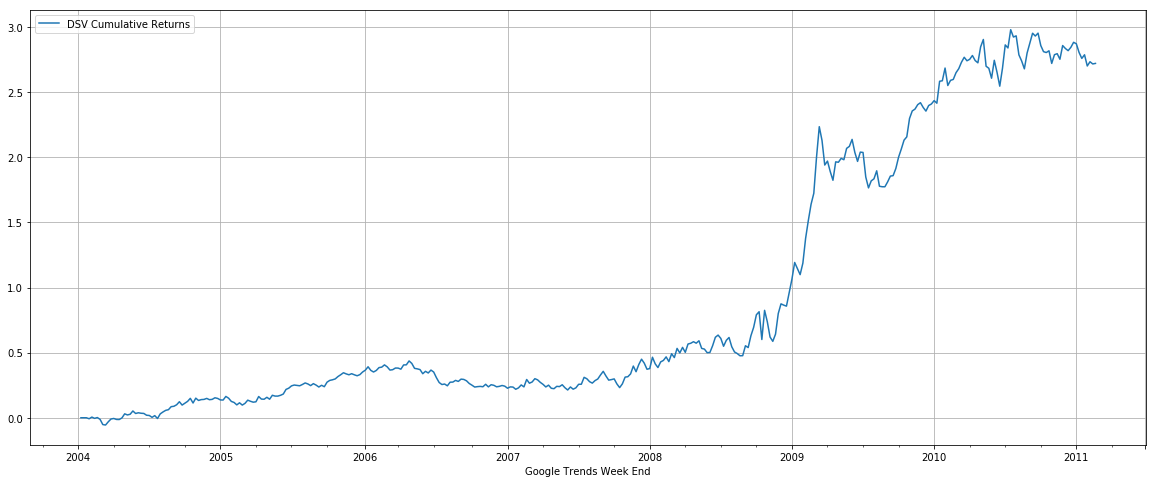

In [203]:
# Plot the cumulative returns having used the debt term data from the paper.
dataset[['DSV Cumulative Returns']].plot(figsize=(20, 8), grid=True)

**While there are differences in the results the overall outcomes are comparable to those found in the paper when using their dataset.**

## References
> Google. (2018). Google Trends. Retrieved from trends.google.com: https://trends.google.com/trends/

> Heydt, M. (2015). Mastering pandas for Finance. Birmingham, United Kingdom: Packt Publishing Ltd.

> Investopedia. (2014, July 14). Simple Moving Average - SMA. Retrieved from investopedia.com: https://www.investopedia.com/terms/s/sma.asp

> Investopedia. (2018, March 27). Cumulative Return. Retrieved from investopedia.com: https://www.investopedia.com/terms/c/cumulativereturn.asp

> Investopedia. (2018, April 10). Percentage Change. Retrieved from investopedia.com: https://www.investopedia.com/terms/p/percentage-change.asp

> NumFOCUS. (2017, December 30). pandas.DataFrame.cumprod, 0.22.0. Retrieved from pandas.pydata.org: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.cumprod.html

> NumFOCUS. (2017, December 30). pandas.DataFrame.pct_change, 0.22.0. Retrieved from pandas.pydata.org: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pct_change.html

> NumFOCUS. (2017, December 30). pandas.DataFrame.rolling, 0.22.0. Retrieved from pandas.pydata.org: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html

> Tobias Preis, H. S. (2013, April 25). Quantifying Trading Behavior in Financial Markets Using Google Trends. Nature, 1-5. doi:10.1038/srep01684

> U.S. Securities and Exchange Commission. (n.d.). STOCK PURCHASES AND SALES: LONG AND SHORT. Retrieved from investor.gov: https://www.investor.gov/introduction-investing/basics/how-market-works/stock-purchases-sales-long-short